In [181]:
import pandas as pd
import numpy as np

In [182]:
url = "https://raw.githubusercontent.com/ozturkfemre/unsupervisedlearning/main/dataset/wdbc.data"
colnames = ["ID", "Diagnosis", "radius", "texture", "perimeter", "area", "smoothness", "compactness", "concavity", "concave.points", "symmetry", "fractal.dimension"]
df = pd.read_csv(url, header=None, usecols=[0,1,2,3,4,5,6,7,8,9,10,11])
df.columns = colnames
df.head() 

,ID,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Since I do not use first two columns in the clustering analysis, I am removing them.

In [183]:
df1 = df.copy()
df = df.drop(["ID", "Diagnosis"], axis = 1)
df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


## Descriptive Statistics

In [184]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave.points,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal.dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


When we check the descriptive statistics of the dataset:

-   Mean of the radius variable is higher then than the median. This means that radius variable is right-skewed. When we compare the values of the third quantile and maximum value, it can be referred that there might be some outliers in the variable. However, it is best to make the final judgement with boxplot analysis.

-   Mean of the texture variable is higher then than the median. This means that texture variable is right-skewed. When we compare the values of the third quantile and maximum value, it can be referred that there might be some outliers in the variable. However, it is best to make the final judgement with boxplot analysis.

-   Mean of the perimeter variable is higher then than the median. This means that perimeter variable is right-skewed. When we compare both the values of the third quantile and maximum value, and min and first quantile value, it can be referred that there might be some outliers in the variable. However, it is best to make the final judgement with boxplot analysis.

From the descriptive statistics, it can easily be stated that values differ a lot. The dataset must be scaled. However, if there is high correlation between variable pairs, PCA needs to be applied to the dataset.


### Correlation Analysis

In [185]:
cm = df.corr()
cm

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave.points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal.dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


<Axes: >

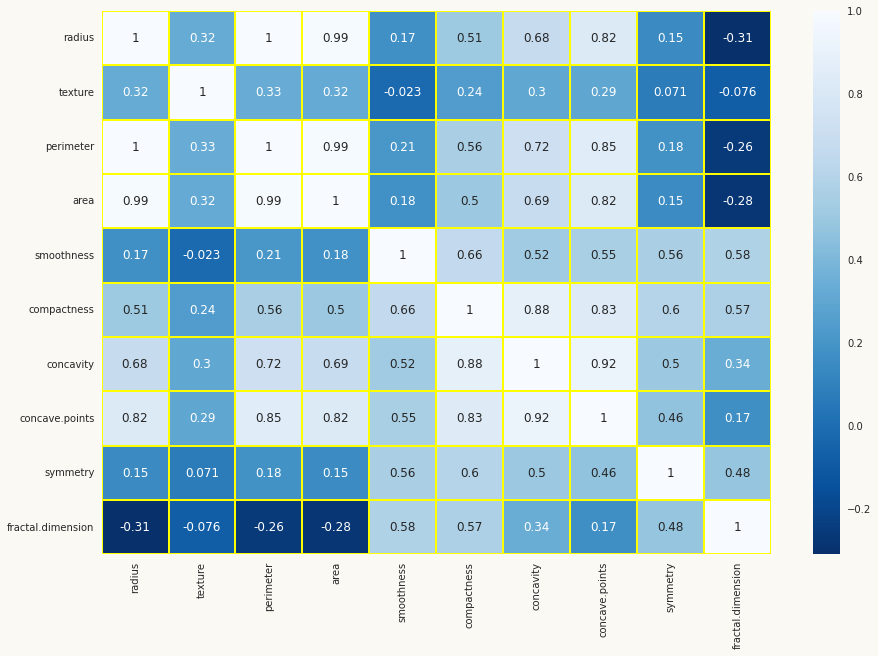

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor("#fbf9f4")
fig.set_facecolor("#fbf9f4")
sns.color_palette("mako", as_cmap=True)
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, cmap="Blues_r", linewidths=2, linecolor='yellow')



Correlation matrix of the dataset reveals that there are high correlation between variable pairs. Correlation between Radius, perimeter, and area variables are more than 0.98. These are too much. Correlation between Compactness, concavity, and concave points variables are more that 0.83. Fractal Dimension is the only variable with negative correlation.


## Data Visualization

In [187]:
df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


<Axes: ylabel='fractal.dimension'>

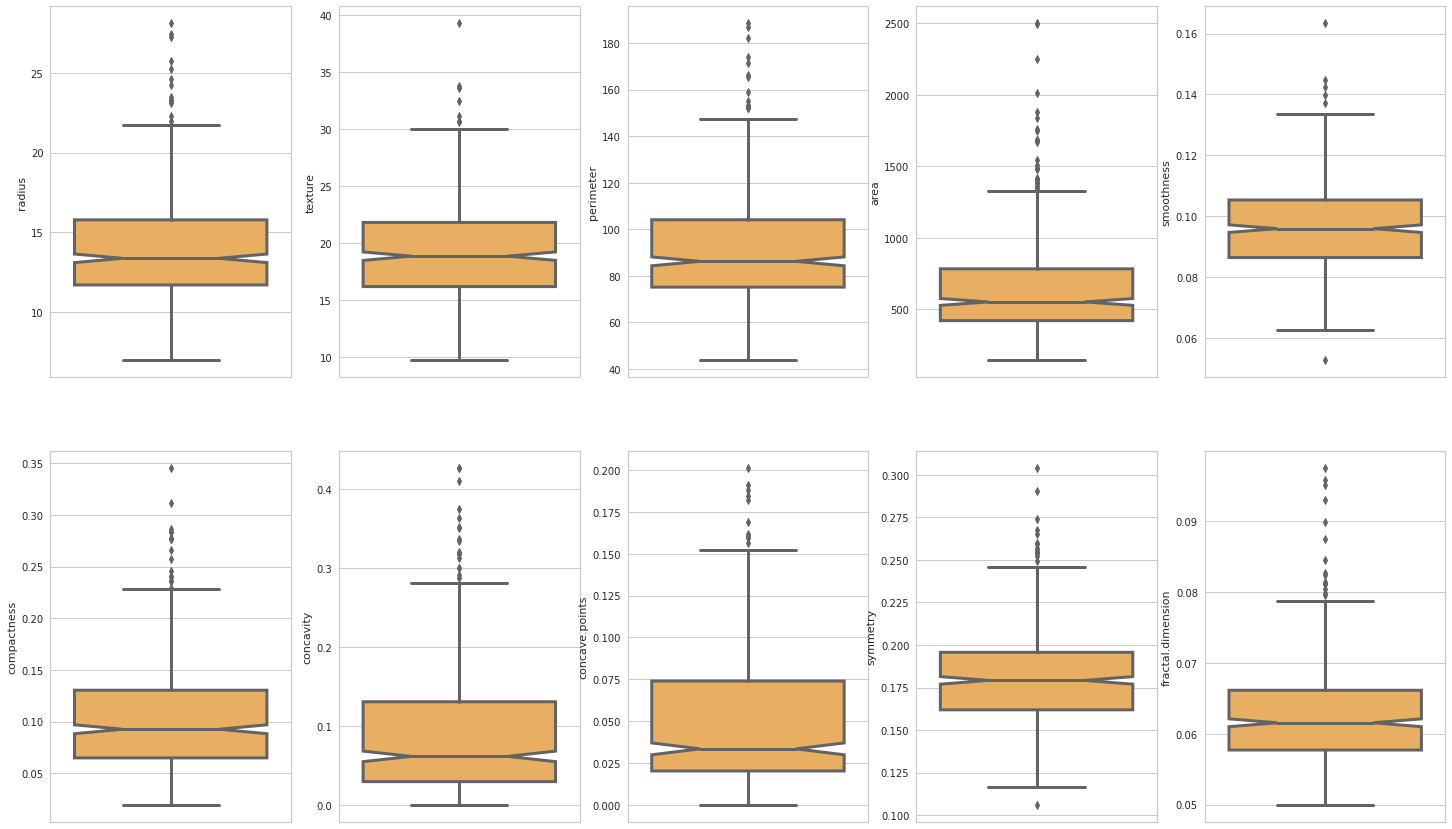

In [188]:
fig = plt.figure(figsize = (25,15))

fig.add_subplot(2, 5, 1)
sns.boxplot(y=df['radius'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 2)
sns.boxplot(y=df['texture'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 3)
sns.boxplot(y=df['perimeter'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 4)
sns.boxplot(y=df['area'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 5)
sns.boxplot(y=df['smoothness'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 6)
sns.boxplot(y=df['compactness'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 7)
sns.boxplot(y=df['concavity'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 8)
sns.boxplot(y=df['concave.points'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 9)
sns.boxplot(y=df['symmetry'], color="#feb24c", linewidth=3, notch = True)

fig.add_subplot(2, 5, 10)
sns.boxplot(y=df['fractal.dimension'], color="#feb24c", linewidth=3, notch = True)


It can be observed from the boxplots that there are lots of outliers in each variables. Variance of the some variables(radius, texture, perimeter, concavity, concave points) is very high.

<Axes: xlabel='Diagnosis', ylabel='fractal.dimension'>

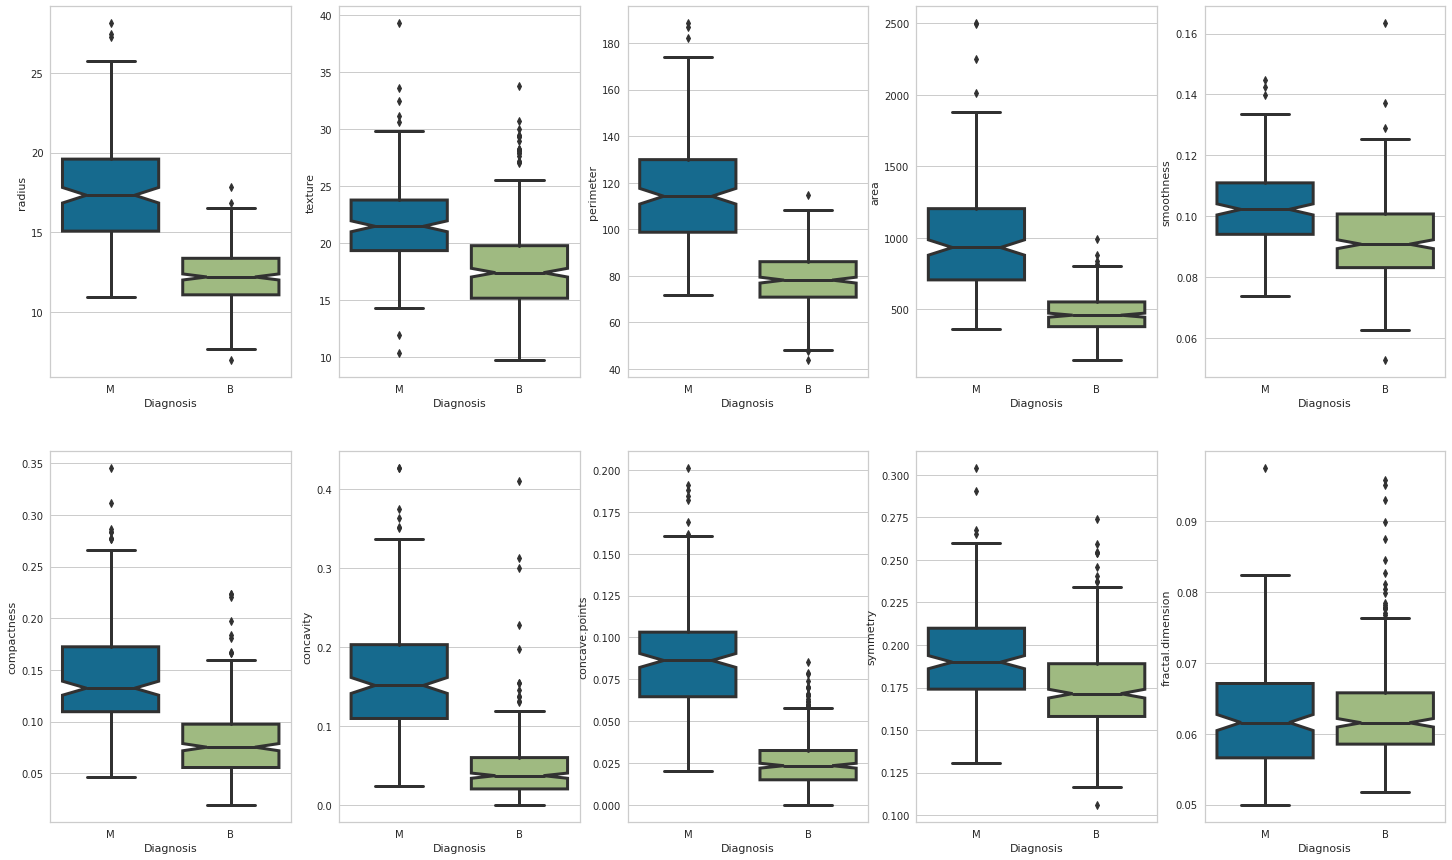

In [189]:
fig = plt.figure(figsize = (25,15))

fig.add_subplot(2, 5, 1)
sns.boxplot(y=df1['radius'], x=df1['Diagnosis'],  linewidth=3, notch = True)

fig.add_subplot(2, 5, 2)
sns.boxplot(y=df1['texture'], x=df1['Diagnosis'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 3)
sns.boxplot(y=df1['perimeter'], x=df1['Diagnosis'],  linewidth=3, notch = True)

fig.add_subplot(2, 5, 4)
sns.boxplot(y=df1['area'], x=df1['Diagnosis'],  linewidth=3, notch = True)

fig.add_subplot(2, 5, 5)
sns.boxplot(y=df1['smoothness'], x=df1['Diagnosis'],  linewidth=3, notch = True)

fig.add_subplot(2, 5, 6)
sns.boxplot(y=df1['compactness'], x=df1['Diagnosis'],  linewidth=3, notch = True)

fig.add_subplot(2, 5, 7)
sns.boxplot(y=df1['concavity'], x=df1['Diagnosis'],  linewidth=3, notch = True)

fig.add_subplot(2, 5, 8)
sns.boxplot(y=df1['concave.points'], x=df1['Diagnosis'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 9)
sns.boxplot(y=df1['symmetry'], x=df1['Diagnosis'], linewidth=3, notch = True)

fig.add_subplot(2, 5, 10)
sns.boxplot(y=df1['fractal.dimension'], x=df1['Diagnosis'], linewidth=3, notch = True)

When the boxplots of the variables according to the levels of Diagnosis are examined, it is noticed that the M level takes higher values for almost every variable. This is not only valid for the fractal.dimension variable. Again, it was noticed that the variance of the M level was higher for all variables except the fractal.dimension variable. This makes the dataset clusterable.


## Principle Component Analysis

In [273]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sdf = StandardScaler().fit_transform(df)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sdf)

pcadf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

pcadf.head()

,PC1,PC2
0,5.224155,3.204428
1,1.728094,-2.540839
2,3.969757,-0.550075
3,3.596713,6.905070
4,3.151092,-1.358072


## Measuring Cluster Tendency

In [191]:
from pyclustertend import hopkins
hopkins(pcadf, len(pcadf) - 1)

0.21065060484726908

According to Hopkins Statistics, dataset is clusterable.

## Clustering

### k-means clustering

In [192]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Determination of the optimal number of cluster

**Elbow Method**

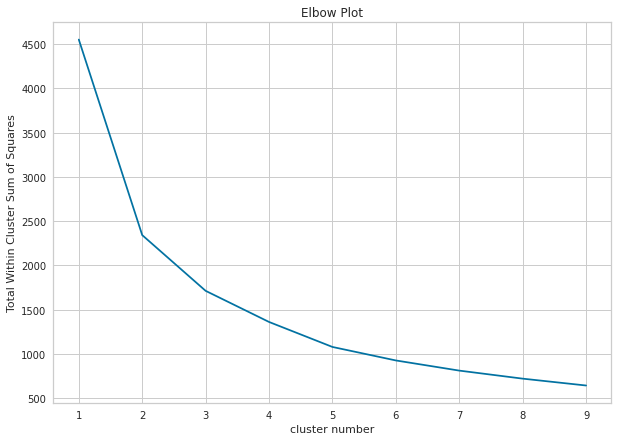

In [193]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters, n_init=25)
 kmeans.fit(pcadf)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.figure(figsize=(10,7))
plt.plot(K,Sum_of_squared_distances, 'x-')
plt.xlabel('cluster number') 
plt.ylabel('Total Within Cluster Sum of Squares') 
plt.title('Elbow Plot')
plt.show()

When the Elbow Method graph is analyzed, it can be said that it is not possible to make a definite decision for the number of clusters, but two clusters can be selected.


**Average Silhouette Method**

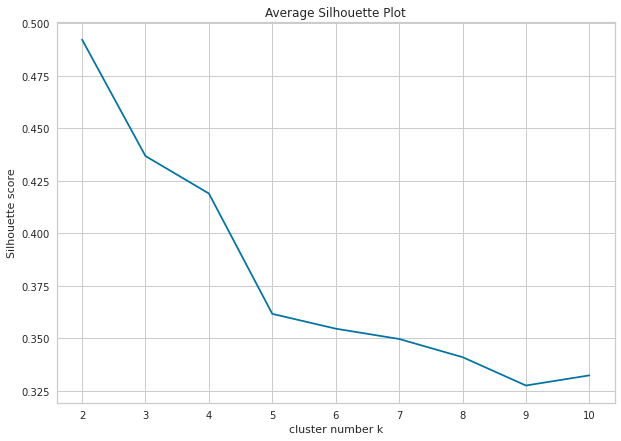

In [194]:
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in K:
 
 # initialise kmeans
 km = KMeans(n_clusters=num_clusters, n_init=25)
 km.fit(pcadf)
 cluster_labels = km.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(pcadf, cluster_labels))

plt.figure(figsize=(10,7))
plt.plot(K,silhouette_avg,'bx-')
plt.xlabel('cluster number k') 
plt.ylabel('Silhouette score') 
plt.title('Average Silhouette Plot')
plt.show()

When the Silhouette graph is analyzed, it can be observed that the highest silhouette value is in two clusters. However, 3 clusters can also be tried since there is not much difference between them.


**Davies Bouldin Method**

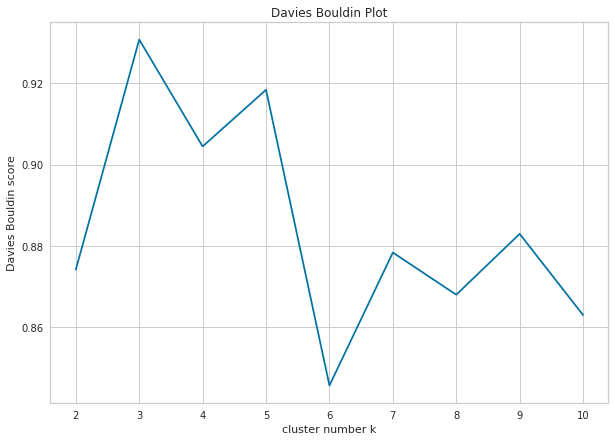

In [195]:
from sklearn.metrics import davies_bouldin_score

K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
db = []
for num_clusters in K:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters, n_init=25)
 kmeans.fit(pcadf)
 cluster_labels = kmeans.fit_predict(pcadf)
 
 # silhouette score
 db.append(davies_bouldin_score(pcadf, cluster_labels))


plt.figure(figsize=(10,7))
plt.plot(K,db,'bx-')
plt.xlabel('cluster number k') 
plt.ylabel('Davies Bouldin score') 
plt.title('Davies Bouldin Plot')
plt.show()

When the Davies Bouldin plot is analyzed, it can be observed that the lowest davies bouldin value is in 6 clusters. This is quite different than the others. I will cluster data set for 2 and 3 clusters as silhouette suggests.s


##### kmeans for 2k

In [196]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, random_state=0, n_init=25, algorithm='lloyd') 

kmeans2.fit(pcadf)

KMeans(n_clusters=2, n_init=25, random_state=0)

In [197]:
zero = []
one = []
for i in kmeans2.labels_:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", kmeans2.cluster_centers_[0],'\n',
       "Cluster 1 :", kmeans2.cluster_centers_[1], '\n','\n',
        "Clustering vector:" ,'\n', kmeans2.labels_, '\n','\n',
         "Total Within Cluster Sum of Squares : ", '\n',
         kmeans2.inertia_ , '\n',
          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one))


 Cluster centers: 
 Cluster 0 : [ 3.00438761 -0.07488982] 
 Cluster 1 : [-1.29082985  0.03217628] 
 
 Clustering vector: 
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 

When the result of the k-means clustering with 2 clusters is examined, the followings are founded:

-   There are 398 observations in cluster 1, 171 observations in cluster 0.

-   Total within cluster sum of squares is 2342.4243127486657


<Figure size 1080x720 with 0 Axes>

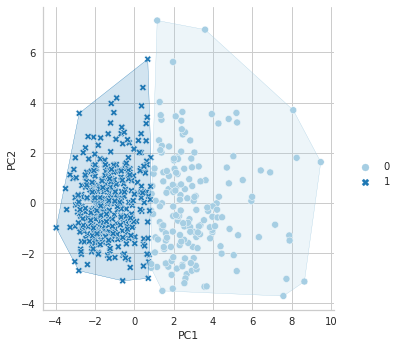

In [198]:
from scipy.spatial import ConvexHull
from matplotlib.colors import to_rgba
sns.set_style("whitegrid")
data = pcadf
xcol = "PC1"
ycol = "PC2"
hues = [0,1]
colors = sns.color_palette("Paired", len(hues))
palette = {hue_val: color for hue_val, color in zip(hues, colors)}
plt.figure(figsize=(15,10))
g = sns.relplot(data=pcadf, x=xcol, y=ycol, hue=kmeans2.labels_, style=kmeans2.labels_, col=kmeans2.labels_, palette=palette, kind="scatter")
def overlay_cv_hull_dataframe(x, y, color, data, hue):
    for hue_val, group in pcadf.groupby(hue):
        hue_color = palette[hue_val]
        points = group[[x, y]].values
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1],
                 facecolor=to_rgba(hue_color, 0.2),
                 edgecolor=hue_color)
g.map_dataframe(overlay_cv_hull_dataframe, x=xcol, y=ycol, hue=kmeans2.labels_)
g.set_axis_labels(xcol, ycol)

plt.show()

Separation can be observed only in PC1 dimension. Within sum of square of the cluster 1 is much than the cluster 0. The reason of this needs to be the difference between observation numbers of the clusters.There is no visible overlap between clusters.


**Cluster Validation for kmeans k=2**

**Silhouette**

/home/feo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


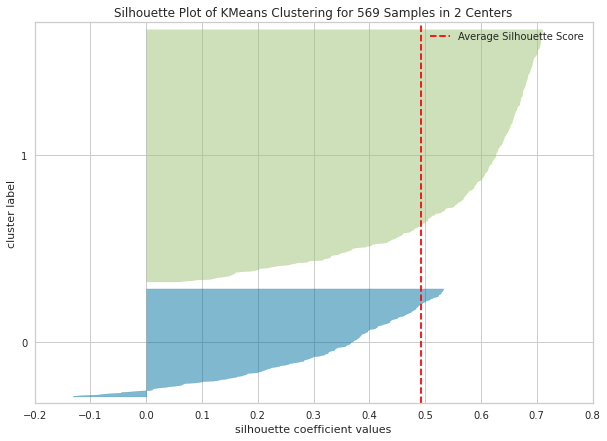

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, n_init=25, random_state=0))

In [199]:
from yellowbrick.cluster import silhouette_visualizer
plt.figure(figsize=(10,7))
silhouette_visualizer(kmeans2, pcadf, colors='yellowbrick')

When the graph containing the silhouette values of each observation is examined, it can be seen that some observations in the first cluster which is shown in blue colored, have negative values. This indicates that those observations may have been assigned to the wrong cluster.

In [200]:
silhouette_score(pcadf, kmeans2.labels_)

0.49228663332300016

Average silhouette score is 0.4922866333230001

In [201]:
clusteringalgorithm = ["kmeans"]
clusternumber = [2]
Overlap = ["None"]
NegativeSilhouette = [1]
AverageSilhouette = [0.49]

**Calinski-Harabasz Score**

In [202]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(pcadf, kmeans2.labels_)


534.4714168884335

In [203]:
chscores = [534.4714168884332]

In [204]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df1['Diagnosis'],kmeans2.labels_)


0.6465880638205838

In [205]:
randscores = [0.6465880638205838] 

In [206]:
df1 = df1.assign(
    Diagnosis = lambda dataframe: dataframe["Diagnosis"].map(lambda Diagnosis: 0 if Diagnosis == "M" else 1)
)

In [207]:
from sklearn.metrics import accuracy_score
accuracy_score(df1['Diagnosis'],kmeans2.labels_)

0.9033391915641477

In [208]:
accuracyrate = [0.90]

##### kmeans for 3k

In [209]:
kmeans3 = KMeans(n_clusters=3, random_state=0, n_init=25, algorithm='lloyd') 

kmeans3.fit(pcadf)

KMeans(n_clusters=3, n_init=25, random_state=0)

In [210]:
zero = []
one = []
two = []
for i in kmeans3.labels_:
    if i == 0:
        zero.append(i)
    elif i == 1:
        one.append(i)
    else:
        two.append(i)


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", kmeans3.cluster_centers_[0],'\n',
       "Cluster 1 :", kmeans3.cluster_centers_[1],'\n',
        "Cluster 2 :", kmeans3.cluster_centers_[2], '\n',
        "Clustering vector:" ,'\n', kmeans3.labels_, '\n',
         "Total Within Cluster Sum of Squares : ", '\n',
         kmeans3.inertia_ , '\n',
          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one), '\n',
          "Cluster 2 :", len(two))


 Cluster centers: 
 Cluster 0 : [1.04646079 1.89652539] 
 Cluster 1 : [-1.53868518 -0.26518367] 
 Cluster 2 : [ 3.35917626 -1.13723881] 
 Clustering vector: 
 [0 2 2 0 2 0 2 0 0 0 1 0 2 1 0 0 1 0 2 1 0 1 0 2 2 0 0 2 0 2 2 0 2 2 0 2 0
 1 1 0 1 0 2 0 1 2 1 0 1 1 1 1 1 2 1 1 2 0 1 1 0 1 0 1 0 0 1 1 0 1 2 0 2 1
 1 1 0 2 2 1 1 0 2 2 1 2 1 2 1 0 1 1 1 1 0 2 1 1 1 0 1 1 1 1 1 0 1 1 2 1 1
 0 0 0 1 1 1 0 0 2 1 2 2 0 1 1 1 2 0 2 1 0 0 1 2 1 1 1 0 1 1 0 1 1 1 0 0 1
 1 1 0 0 0 1 1 1 2 1 1 1 0 2 2 1 2 1 1 1 2 1 1 1 0 1 1 1 0 2 1 1 2 2 1 1 1
 1 2 1 1 1 0 1 1 0 0 1 0 2 2 0 1 2 2 0 1 1 1 1 0 1 2 1 2 2 0 0 1 1 2 2 1 0
 1 0 1 1 1 1 1 0 2 1 1 2 1 1 2 2 1 2 1 1 0 1 2 1 1 1 1 1 2 1 2 2 2 0 2 0 0
 2 2 1 2 1 2 2 1 1 1 1 1 1 2 1 1 0 1 2 1 1 2 1 2 0 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 0 2 1 2 1 1 1 1 0 0 0 1 1
 1 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 0 1 0 2 0 1 1 0 1 1 1 1 1 1 1 1 2 2 1 2 2
 2 1 2 2 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 2 1 1 0 2 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 2 1 1 1 1 1 

When the result of the k-means clustering with 3 clusters is examined, the followings are founded:

-   There are 117 observations in cluster 0, 117 observations in cluster 2, and 335 observations in cluster 1.
-   Total within cluster sum of squares for clusters are 1713.272535431522 

<Figure size 1080x720 with 0 Axes>

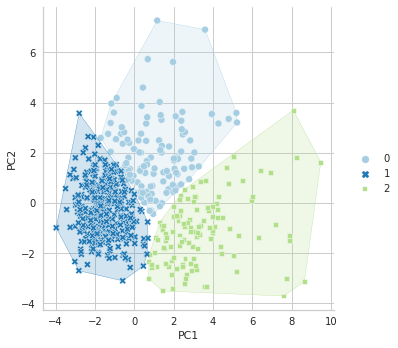

In [211]:
sns.set_style("whitegrid")
data = pcadf
xcol = "PC1"
ycol = "PC2"
hues = [0,1,2]
colors = sns.color_palette("Paired", len(hues))
palette = {hue_val: color for hue_val, color in zip(hues, colors)}
plt.figure(figsize=(15,10))
g = sns.relplot(data=pcadf, x=xcol, y=ycol, hue=kmeans3.labels_, style=kmeans3.labels_, col=kmeans3.labels_, palette=palette, kind="scatter")
def overlay_cv_hull_dataframe(x, y, color, data, hue):
    for hue_val, group in pcadf.groupby(hue):
        hue_color = palette[hue_val]
        points = group[[x, y]].values
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1],
                 facecolor=to_rgba(hue_color, 0.2),
                 edgecolor=hue_color)
g.map_dataframe(overlay_cv_hull_dataframe, x=xcol, y=ycol, hue=kmeans3.labels_)
g.set_axis_labels(xcol, ycol)

plt.show()

There is no overlap between clusters.

Separation can be observed both in PC1 and in PC2 dimensions.

Within sum of square of the cluster 2 is more than other clusters.


**Cluster Validation for kmeans k = 3**

**Silhouette**

/home/feo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


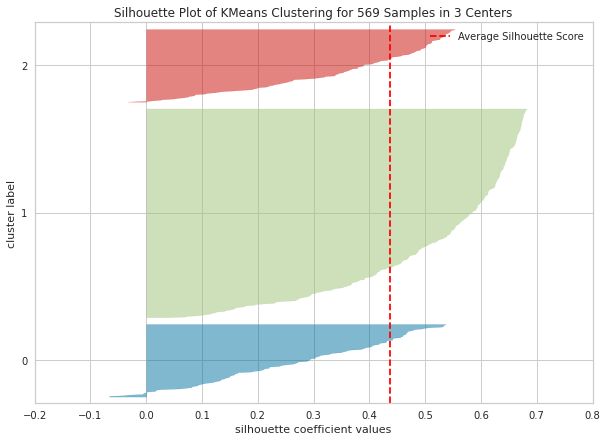

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 569 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, n_init=25, random_state=0))

In [212]:
from yellowbrick.cluster import silhouette_visualizer
plt.figure(figsize=(10,7))
silhouette_visualizer(kmeans3, pcadf, colors='yellowbrick')

When the graph containing the silhouette values of each observation is examined, it can be seen that some observations in the cluster which is shown as red, and in the cluster which is shown as yellow have negative values.

In [213]:
silhouette_score(pcadf, kmeans3.labels_)

0.4368121821485489

The average silhouette value was observed as 0.4368121821485489. This will be compared with other clustering results.

In [214]:
clusteringalgorithm = ["kmeans2", "kmeans3"]
clusternumber = [2,3]
Overlap = ["None", "None"]
NegativeSilhouette = [1,1]
AverageSilhouette = [0.49, 0.43]

**Calinski-Harabasz**

In [215]:
chscores = [534.4714168884332, calinski_harabasz_score(pcadf, kmeans3.labels_)]

**Adjusted Rand Score**

In [216]:
randscores = [0.6465880638205838, adjusted_rand_score(df1['Diagnosis'],kmeans3.labels_)]

**Accuracy Rate**

In [217]:
accuracyrate = [0.90, accuracy_score(df1['Diagnosis'],kmeans2.labels_)]

### k-medoids clustering

In [218]:
from sklearn_extra.cluster import KMedoids

#### Determination of the optimal number of clusters

**Elbow Method**

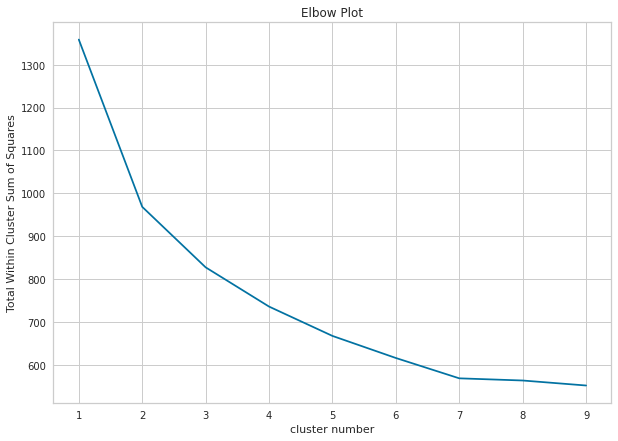

In [219]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmedoid = KMedoids(n_clusters=num_clusters)
 kmedoid.fit(pcadf)
 Sum_of_squared_distances.append(kmedoid.inertia_)
plt.figure(figsize=(10,7))
plt.plot(K,Sum_of_squared_distances, 'x-')
plt.xlabel('cluster number') 
plt.ylabel('Total Within Cluster Sum of Squares') 
plt.title('Elbow Plot')
plt.show()

When the Elbow Method graph is analyzed, it can be said that it is not possible to make a definite decision for the number of clusters, but two clusters can be selected.


**Average Silhouette Method**

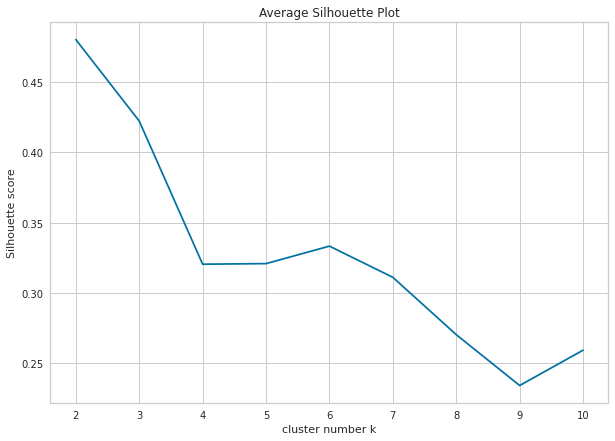

In [220]:
K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in K:
 
 # initialise kmeans
 kmedoids = KMedoids(n_clusters=num_clusters)
 kmedoids.fit(pcadf)
 cluster_labels = kmedoids.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(pcadf, cluster_labels))

plt.figure(figsize=(10,7))
plt.plot(K,silhouette_avg,'bx-')
plt.xlabel('cluster number k') 
plt.ylabel('Silhouette score') 
plt.title('Average Silhouette Plot')
plt.show()

When the Silhouette graph is analyzed, it can be observed that the highest silhouette value is in two clusters.

**Davies-Bouldin Method**

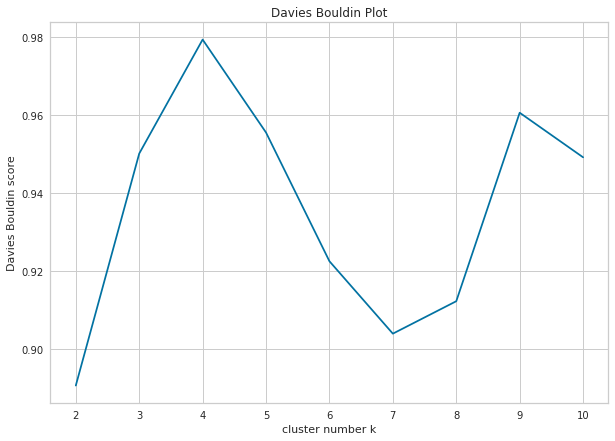

In [221]:
from sklearn.metrics import davies_bouldin_score

K = [2, 3, 4, 5, 6, 7, 8, 9, 10]
db = []
for num_clusters in K:
 
 # initialise kmeans
 kmedoids = KMedoids(n_clusters=num_clusters)
 kmedoids.fit(pcadf)
 cluster_labels = kmedoids.fit_predict(pcadf)
 
 # silhouette score
 db.append(davies_bouldin_score(pcadf, cluster_labels))


plt.figure(figsize=(10,7))
plt.plot(K,db,'bx-')
plt.xlabel('cluster number k') 
plt.ylabel('Davies Bouldin score') 
plt.title('Davies Bouldin Plot')
plt.show()

When the Davies Bouldin graph is analyzed, it can be observed that the lowest davies-bouldin value is in two clusters.

##### k-medoids for k = 2

In [222]:
kmedoids2 = KMedoids(n_clusters=2)
kmedoids2.fit(pcadf)

KMedoids(n_clusters=2)

In [223]:
zero = []
one = []
for i in kmedoids2.labels_:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)


print('\n',
      "Cluster medoids:", '\n',
      "Cluster 0 :", kmedoids2.cluster_centers_[0],'\n',
       "Cluster 1 :", kmedoids2.cluster_centers_[1], '\n','\n',
        "Clustering vector:" ,'\n', kmedoids2.labels_, '\n','\n',
         "Total Within Cluster Sum of Squares : ", '\n',
         kmedoids2.inertia_ , '\n',
          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one))


 Cluster medoids: 
 Cluster 0 : [ 2.35928485 -0.30157828] 
 Cluster 1 : [-1.35986794 -0.03765549] 
 
 Clustering vector: 
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1
 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0
 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 

When the output of clustering algorithm is analyzed, the followings can be stated:
-   There are 190 observations in cluster 0, 379 observations in cluster 1 which can be stated as unbalanced.
-   Cluster medoid for cluster 0 is [ 2.35928485 -0.30157828], [-1.35986794 -0.03765549] is for cluster 1.
-   Total within cluster sum of squares is 968.3783653743101.

<Figure size 1080x720 with 0 Axes>

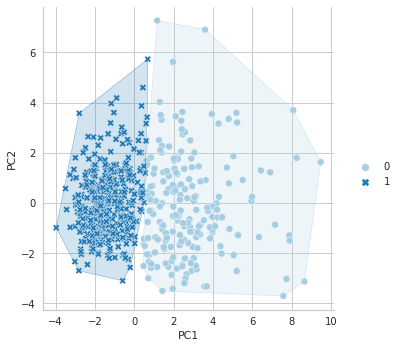

In [224]:
from scipy.spatial import ConvexHull
from matplotlib.colors import to_rgba
sns.set_style("whitegrid")
data = pcadf
xcol = "PC1"
ycol = "PC2"
hues = [0,1]
colors = sns.color_palette("Paired", len(hues))
palette = {hue_val: color for hue_val, color in zip(hues, colors)}
plt.figure(figsize=(15,10))
g = sns.relplot(data=pcadf, x=xcol, y=ycol, hue=kmedoids2.labels_, style=kmedoids2.labels_, col=kmedoids2.labels_, palette=palette, kind="scatter")
def overlay_cv_hull_dataframe(x, y, color, data, hue):
    for hue_val, group in pcadf.groupby(hue):
        hue_color = palette[hue_val]
        points = group[[x, y]].values
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1],
                 facecolor=to_rgba(hue_color, 0.2),
                 edgecolor=hue_color)
g.map_dataframe(overlay_cv_hull_dataframe, x=xcol, y=ycol, hue=kmedoids2.labels_)
g.set_axis_labels(xcol, ycol)

plt.show()

No overlap is observed when two and three dimensional graphs are analyzed. Just like in the k-means, it is observed that the separation occurs only in the PC1 dimension. The variance in the cluster shown in lighter blue is higher.


**Cluster Validation of kmedoids for k = 2**

**Silhouette**

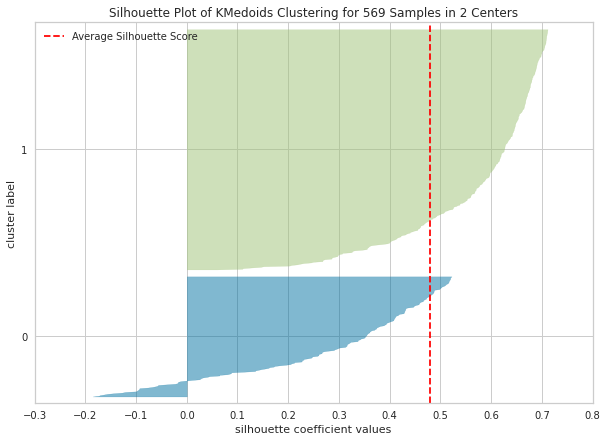

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMedoids Clustering for 569 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', estimator=KMedoids(n_clusters=2))

In [225]:
from yellowbrick.cluster import silhouette_visualizer
plt.figure(figsize=(10,7))
silhouette_visualizer(kmedoids2, pcadf, colors='yellowbrick')

When the graph containing the silhouette values of each observation is examined, it can be seen that some observations in the cluster which is shown in blue colored, have negative values. This indicates that those observations may have been assigned to the wrong cluster.


In [226]:
silhouette_score(pcadf, kmedoids2.labels_)

0.4804394289331366

Average Silhouette value for this clustering is 0.4804394289331365. 

In [227]:
clusteringalgorithm = ["kmeans2", "kmeans3", "kmedodis2"]
clusternumber = [2,3,2]
Overlap = ["None", "None", "None"]
NegativeSilhouette = [1,1,1]
AverageSilhouette = [0.49, 0.43, 0.48]

**Calinski-Harabasz**

In [228]:
chscores.append(calinski_harabasz_score(pcadf, kmedoids2.labels_))
chscores

[534.4714168884332, 468.6501049469908, 529.0982765669434]

**Adjusted Rand Score**

In [229]:
randscores.append(adjusted_rand_score(df1['Diagnosis'],kmedoids2.labels_))

**Accuracy Rate**

In [230]:
accuracyrate.append(accuracy_score(df1['Diagnosis'],kmedoids2.labels_))

#### Hierarchical Clustering

In this section, I will cluster the dataset with the Ward's Minimum Variance and Average Linkage methods of the hierarchical clustering algorithm.

##### Ward's Minimum Variance Method

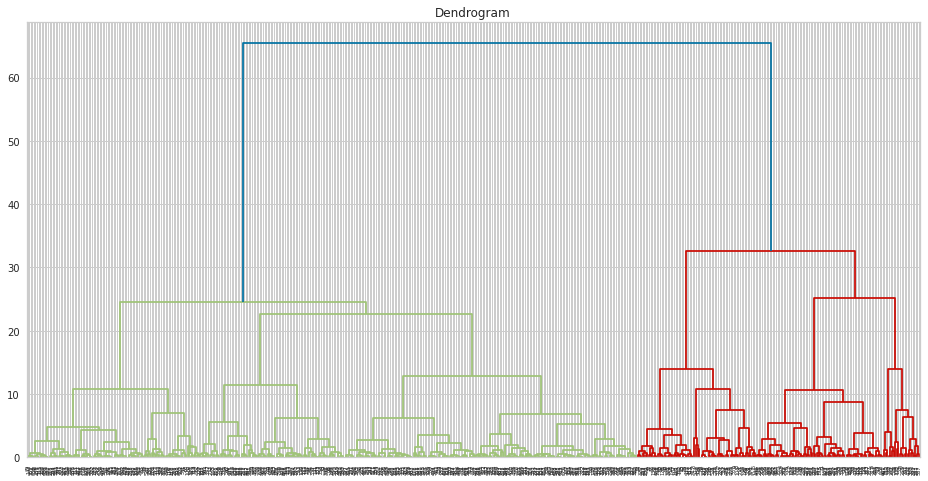

In [231]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (16 ,8))

dendrogram = sch.dendrogram(sch.linkage(pcadf, method  = "ward"))

plt.title("Dendrogram")
plt.show()


According to the dendogram, it is best to cut distance at 35-40. So 2 clusters is ok for this method.

In [232]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, metric = "euclidean", linkage = "ward")
ward2 = hc.fit_predict(pcadf)

In [233]:
zero = []
one = []
for i in ward2:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)

print("Observation Numbers :", '\n',
    "Cluster 0: ", len(zero),'\n',
    "Cluster 1: ", len(one))

Observation Numbers : 
 Cluster 0:  180 
 Cluster 1:  389


<Figure size 1080x720 with 0 Axes>

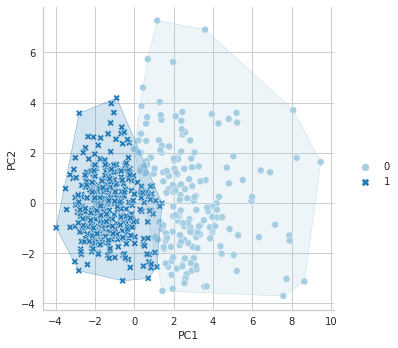

In [234]:
from scipy.spatial import ConvexHull
from matplotlib.colors import to_rgba
sns.set_style("whitegrid")
data = pcadf
xcol = "PC1"
ycol = "PC2"
hues = [0,1]
colors = sns.color_palette("Paired", len(hues))
palette = {hue_val: color for hue_val, color in zip(hues, colors)}
plt.figure(figsize=(15,10))
g = sns.relplot(data=pcadf, x=xcol, y=ycol, hue=ward2, style=ward2, col=ward2, palette=palette, kind="scatter")
def overlay_cv_hull_dataframe(x, y, color, data, hue):
    for hue_val, group in pcadf.groupby(hue):
        hue_color = palette[hue_val]
        points = group[[x, y]].values
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1],
                 facecolor=to_rgba(hue_color, 0.2),
                 edgecolor=hue_color)
g.map_dataframe(overlay_cv_hull_dataframe, x=xcol, y=ycol, hue=ward2)
g.set_axis_labels(xcol, ycol)

plt.show()

Overlap is observed when two dimensional plot is analyzed. It is observed that the separation occurs only in the PC1 dimension. The variance in the cluster shown in lighter blue is higher.

**Cluster Validation for Ward's Method**

**Silhouette**

In [235]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics.pairwise import euclidean_distances
dist = euclidean_distances(pcadf,pcadf)
wardsilhouettes = silhouette_samples(dist, ward2)


In [236]:
np.where(wardsilhouettes < 0)

(array([ 29,  35,  41,  43,  47,  64,  76,  81,  89, 127, 193, 196, 208,
        215, 264, 356, 444, 469, 485, 518, 520, 528, 537]),)

When we check the silhouette values of each observation in the data set, it is observed that some samples has negative silhouette value which means these observations clustered falsely.

In [237]:
silhouette_score(pcadf, ward2)

0.47753158879966473

Average Silhouette value for this clustering is 0.4775315887996646

In [238]:
clusteringalgorithm = ["kmeans2", "kmeans3", "kmedodis2", "ward2"]
clusternumber = [2,3,2,2]
Overlap = ["None", "None", "None", "Yes"]
NegativeSilhouette = [1,1,1,1]
AverageSilhouette = [0.49, 0.43, 0.48, 0.47]

**Calinski - Harabasz Method, Adjusted Rand Index, and Accuracy Rate**

In [239]:
chscores.append(calinski_harabasz_score(pcadf, ward2))
randscores.append(adjusted_rand_score(df1['Diagnosis'],ward2))
accuracyrate.append(accuracy_score(df1['Diagnosis'],ward2))

#### Average Linkage Method

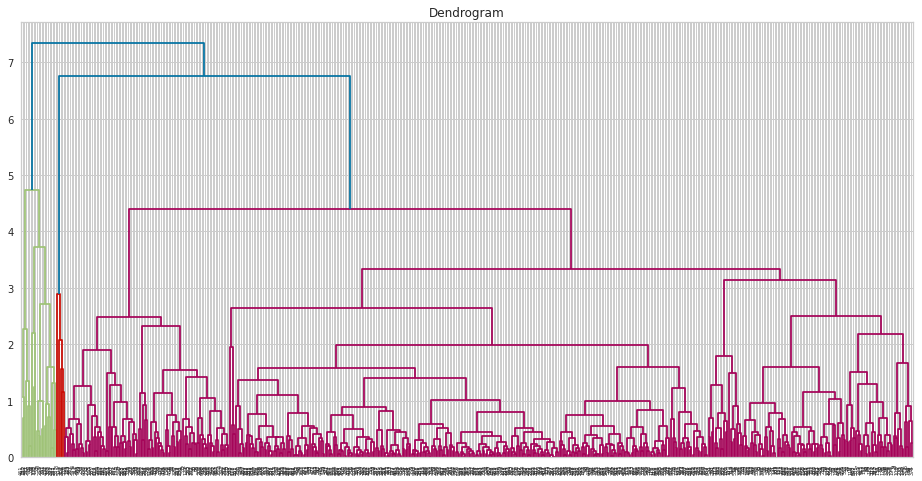

In [240]:
plt.figure(figsize = (16 ,8))

dendrogram = sch.dendrogram(sch.linkage(pcadf, method  = "average"))

plt.title("Dendrogram")
plt.show()

According to the dendogram, in each case there will be unbalance between observation numbers in clusters. Yet, it looks like 3 clusters is ok for this method.

In [241]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 32, metric = "euclidean", linkage = "average")
average3 = hc.fit_predict(pcadf)

In [242]:
zero = []
one = []
two = []
for i in average3:
    if i == 0:
        zero.append(i)
    elif i == 1:
        one.append(i)
    else:
        two.append(i)

print("Observation Numbers :", '\n',
    "Cluster 0: ", len(zero),'\n',
    "Cluster 1: ", len(one), '\n',
    "Cluster 2: ", len(two))

Observation Numbers : 
 Cluster 0:  30 
 Cluster 1:  24 
 Cluster 2:  515


Just as observed in the dendogram, observaton numbers are unbalanced. This is not a thing that I want. Yet, I will check the validation metrics.

**Validation Metrics for Average Linkage**

**Silhouette**

In [243]:
averagesilhouettes = silhouette_samples(dist, average3)
np.where(averagesilhouettes < 0)

(array([ 19,  40,  55,  63,  70,  71,  76,  87,  88,  92,  95,  97, 108,
        122, 133, 144, 147, 154, 155, 159, 163, 171, 172, 175, 179, 196,
        200, 218, 225, 230, 239, 241, 247, 254, 261, 273, 279, 282, 283,
        286, 287, 292, 297, 298, 308, 309, 311, 315, 316, 318, 319, 320,
        327, 331, 337, 348, 350, 352, 355, 359, 360, 377, 387, 395, 401,
        403, 424, 427, 438, 446, 465, 469, 479, 491, 493, 505, 509, 510,
        517, 520, 521, 523, 524, 526, 535, 537, 538, 545, 546, 549, 550,
        553]),)

Number of observations that have negative silhouette values are more than any other clustering algorithms. This is expected when I consider the unbalance between number of observations in each cluster.

In [244]:
silhouette_score(pcadf, average3)

0.2638007625764765

Average Silhouette value for this clustering is 0.2638007625764765

In [245]:
clusteringalgorithm.append("average3")
clusternumber.append(3)
Overlap.append("Yes")
NegativeSilhouette.append(1)
AverageSilhouette.append(0.26)

**Calinski - Harabasz Method, Adjusted Rand Index, and Accuracy Rate**

In [246]:
chscores.append(calinski_harabasz_score(pcadf, average3))
randscores.append(adjusted_rand_score(df1['Diagnosis'],average3))
accuracyrate.append(accuracy_score(df1['Diagnosis'],average3))

### Model-Based Clustering(GMM)

At first, I will start by deciding n_components.

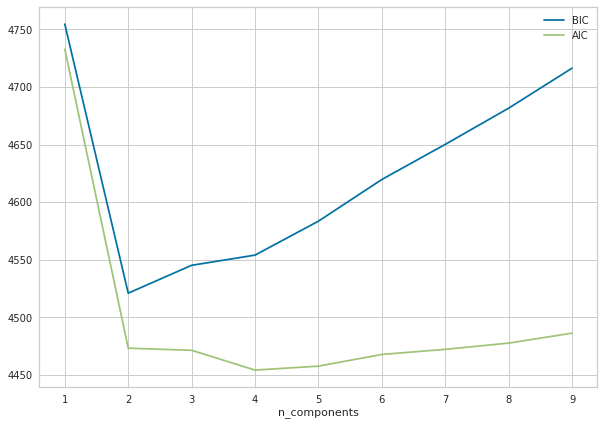

In [247]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(pcadf)
          for n in n_components]

plt.figure(figsize= (10,7))
plt.plot(n_components, [m.bic(pcadf) for m in models], label='BIC')
plt.plot(n_components, [m.aic(pcadf) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');


According to da BIC, the best n_component is 2. However, according to AIC, it is 4. I will try for both of them.

#### GMM for k=2

In [248]:
gmm2 = GaussianMixture(n_components=2)
labels2 = gmm2.fit(pcadf).predict(pcadf)

<Figure size 1080x720 with 0 Axes>

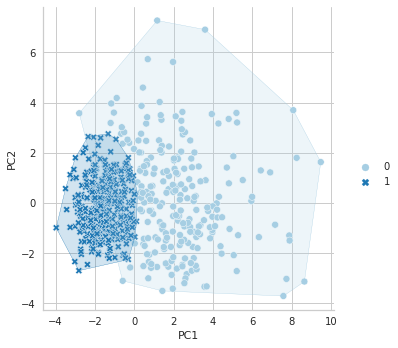

In [249]:
from scipy.spatial import ConvexHull
from matplotlib.colors import to_rgba
sns.set_style("whitegrid")
data = pcadf
xcol = "PC1"
ycol = "PC2"
hues = [0,1]
colors = sns.color_palette("Paired", len(hues))
palette = {hue_val: color for hue_val, color in zip(hues, colors)}
plt.figure(figsize=(15,10))
g = sns.relplot(data=pcadf, x=xcol, y=ycol, hue=labels2, style=labels2, col=labels2, palette=palette, kind="scatter")
def overlay_cv_hull_dataframe(x, y, color, data, hue):
    for hue_val, group in pcadf.groupby(hue):
        hue_color = palette[hue_val]
        points = group[[x, y]].values
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1],
                 facecolor=to_rgba(hue_color, 0.2),
                 edgecolor=hue_color)
g.map_dataframe(overlay_cv_hull_dataframe, x=xcol, y=ycol, hue=labels2)
g.set_axis_labels(xcol, ycol)

plt.show()

Overlap is not observed when two dimensional plot is analyzed. It is observed that the separation occurs only in the PC1 dimension. The variance in the cluster shown in lighter blue is higher.

In [250]:
zero = []
one = []
for i in labels2:
    if i == 0:
        zero.append(i)
    else:
        one.append(i)


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", gmm2.means_[0],'\n',
       "Cluster 1 :", gmm2.means_[1], '\n','\n',
        "Clustering vector:" ,'\n', labels2, '\n','\n',

          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one))


 Cluster centers: 
 Cluster 0 : [1.90851996 0.17131485] 
 Cluster 1 : [-1.53177366 -0.1374969 ] 
 
 Clustering vector: 
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 

Unlike other algorithms, the difference between the number of observations in each cluster in the GMM model with 2 n_components was close to each other. A clearer picture can be obtained with the validity metrics.

**Cluster Validation for gmm k = 2**

**Silhouette**

In [251]:
gmmsilhouettes = silhouette_samples(dist, labels2)
np.where(gmmsilhouettes < 0)

(array([ 11,  13,  36,  41,  43,  60,  64,  71,  75,  81,  86,  89,  91,
         99, 101, 113, 119, 123, 141, 145, 151, 167, 186, 193, 199, 207,
        208, 214, 215, 223, 242, 255, 261, 274, 290, 330, 349, 353, 356,
        363, 375, 380, 435, 469, 484, 485, 491, 500, 507, 518, 528, 536,
        537, 541, 566]),)

Number of observations that have negative silhouette values are more than any other clustering algorithms. 

In [252]:
silhouette_score(pcadf, labels2)

0.4449657731812856

In [253]:
clusteringalgorithm.append("gmm2")
clusternumber.append(2)
Overlap.append("Yes")
NegativeSilhouette.append(1)
AverageSilhouette.append(0.44)

**Calinski - Harabasz Method, Adjusted Rand Index, and Accuracy Rate**

In [254]:
chscores.append(calinski_harabasz_score(pcadf, labels2))
randscores.append(adjusted_rand_score(df1['Diagnosis'],labels2))
accuracyrate.append(accuracy_score(df1['Diagnosis'],labels2))

#### GMM for k=4

In [255]:
gmm4 = GaussianMixture(n_components=4)
labels4 = gmm4.fit(pcadf).predict(pcadf)

<Figure size 1080x720 with 0 Axes>

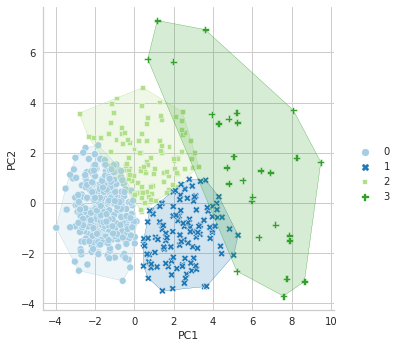

In [256]:
from scipy.spatial import ConvexHull
from matplotlib.colors import to_rgba
sns.set_style("whitegrid")
data = pcadf
xcol = "PC1"
ycol = "PC2"
hues = [0,1,2,3]
colors = sns.color_palette("Paired", len(hues))
palette = {hue_val: color for hue_val, color in zip(hues, colors)}
plt.figure(figsize=(15,10))
g = sns.relplot(data=pcadf, x=xcol, y=ycol, hue=labels4, style=labels4, col=labels4, palette=palette, kind="scatter")
def overlay_cv_hull_dataframe(x, y, color, data, hue):
    for hue_val, group in pcadf.groupby(hue):
        hue_color = palette[hue_val]
        points = group[[x, y]].values
        hull = ConvexHull(points)
        plt.fill(points[hull.vertices, 0], points[hull.vertices, 1],
                 facecolor=to_rgba(hue_color, 0.2),
                 edgecolor=hue_color)
g.map_dataframe(overlay_cv_hull_dataframe, x=xcol, y=ycol, hue=labels4)
g.set_axis_labels(xcol, ycol)

plt.show()

Overlap is not observed when two dimensional plot is analyzed. It is observed that the separation occurs both in the PC1 and PC2 dimension. The variance in the cluster shown in darker blue and lighter green is higher.

In [257]:
zero = []
one = []
two = []
three = []
for i in labels4:
    if i == 0:
        zero.append(i)
    elif i == 1:
        one.append(i)
    elif i == 2:
        two.append(i)
    else:
        three.append(i)
        


print('\n',
      "Cluster centers:", '\n',
      "Cluster 0 :", gmm4.means_[0],'\n',
        "Cluster 1 :", gmm4.means_[1], '\n',
        "Cluster 2 :", gmm4.means_[2],'\n',
        "Cluster 3 :", gmm4.means_[3],'\n','\n',
        "Clustering vector:" ,'\n', labels4, '\n',

          "Observation numbers :", '\n',
          "Cluster 0 :", len(zero), '\n',
          "Cluster 1 :", len(one), '\n',
          "Cluster 2 :", len(two), '\n',
          "Cluster 3 :", len(three))


 Cluster centers: 
 Cluster 0 : [-1.59452115 -0.25986376] 
 Cluster 1 : [ 2.25556339 -1.16630127] 
 Cluster 2 : [0.30039412 1.38235733] 
 Cluster 3 : [4.79425062 1.21370318] 
 
 Clustering vector: 
 [3 1 1 3 1 2 1 2 2 2 0 1 3 1 2 2 0 2 1 0 2 0 2 1 1 3 2 1 2 1 1 2 1 1 2 1 2
 0 0 2 0 2 1 2 0 1 0 2 0 0 0 0 0 1 0 0 1 2 0 0 2 0 2 0 2 2 0 0 2 0 1 2 1 0
 0 1 2 1 3 0 0 2 3 1 0 1 2 1 0 2 0 1 0 0 2 1 0 0 0 2 0 2 0 0 0 2 0 0 3 0 0
 2 2 2 2 0 0 2 2 1 0 1 3 2 0 0 0 1 2 1 0 1 1 0 1 0 0 0 2 0 0 1 0 0 0 2 2 0
 0 0 2 2 3 0 0 0 1 0 0 0 2 1 1 0 1 0 0 1 1 0 0 0 2 0 0 0 2 1 0 0 3 3 0 0 0
 0 1 0 0 0 2 0 0 2 2 0 2 1 1 2 0 1 3 2 0 0 0 1 2 0 1 0 3 1 2 2 0 0 1 1 0 2
 0 2 0 0 0 0 0 2 1 0 0 1 0 0 1 1 0 1 0 0 2 0 1 0 0 0 0 0 1 0 1 1 1 2 1 3 3
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 2 0 1 0 0 1 0 1 1 0 0 0 0 2 0 2 0 0 0 0 0
 0 0 0 0 1 0 3 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 0 2 1 0 3 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 3 2 0 0 1 0 0 0 0 0 2 0 3 3 1 0 0 2 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 1 0 0 2 3 0

When the output of the algorithm is analyzed, it is observed that observation numbers of each cluster is close to each other. 

**Cluster Validation for gmm k = 4**

**Silhouette**

In [258]:
gmmsilhouettes = silhouette_samples(dist, labels4)
np.where(gmmsilhouettes < 0)

(array([ 11,  13,  17,  28,  75,  86,  91, 114, 118, 131, 132, 141, 160,
        236, 275, 302, 314, 320, 330, 340, 353, 369, 396, 430, 482, 509,
        541, 562]),)

Number of observations that have negative silhouette values are more than any other clustering algorithms. 

In [259]:
silhouette_score(pcadf, labels4)


0.4250090660660973

The average silhouette value of model is 0.32

In [260]:
clusteringalgorithm.append("gmm4")
clusternumber.append(4)
Overlap.append("Yes")
NegativeSilhouette.append(1)
AverageSilhouette.append(0.32)

**Calinski - Harabasz Method, Adjusted Rand Index, and Accuracy Rate**

In [261]:
chscores.append(calinski_harabasz_score(pcadf, labels4))
randscores.append(adjusted_rand_score(df1['Diagnosis'],labels4))
accuracyrate.append(accuracy_score(df1['Diagnosis'],labels4))

### Density Based Clustering

At first, I will decide epsilon value.

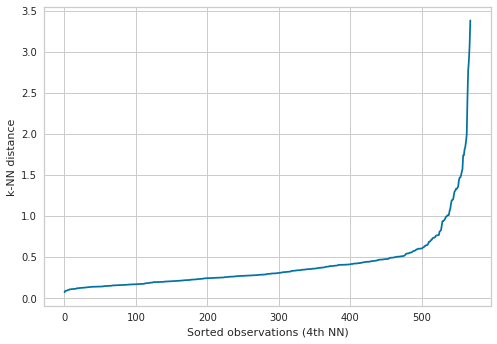

In [262]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors = 5).fit(pcadf)
neigh_dist, neigh_ind = nbrs.kneighbors(pcadf)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [263]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)

1.7367892222137986


So our epsilon value is 1.73

In [264]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 1.73, min_samples = 20).fit(pcadf)

In [265]:
dbscanlabels = dbscan.labels_

In [266]:
set(dbscanlabels)

{-1, 0}

-1 in here means observations that are not clustered because they are noisy. So there is only 0 left. In other words, DBSCAN clustered data to only one cluster. I believe at this point there is no need to check validity indices, because one cluster means no cluster :)

## Determination of the best Clustering Algorithm

In [267]:
results = {"Algorithm": clusteringalgorithm, 
           "k": clusternumber,
           "Overlap": Overlap,
           "AverageSilhouette": AverageSilhouette,
           "CalinskiHarabasz": chscores,
           "AdjustedRandIndex": randscores,
           "AccuracyRate": accuracyrate,
           "NegativeSilhouette": NegativeSilhouette} 
  
results = pd.DataFrame(results)
results

,Algorithm,k,Overlap,AverageSilhouette,CalinskiHarabasz,AdjustedRandIndex,AccuracyRate,NegativeSilhouette
0,kmeans2,2,None,0.49,534.471417,0.646588,0.900000,1
1,kmeans3,3,None,0.43,468.650105,0.498540,0.903339,1
2,kmedodis2,2,None,0.48,529.098277,0.724159,0.926186,1
3,ward2,2,Yes,0.47,504.271034,0.564006,0.876977,1
4,average3,3,Yes,0.26,256.045384,0.162410,0.057996,1
5,gmm2,2,Yes,0.44,458.151592,0.626731,0.896309,1
6,gmm4,4,Yes,0.32,388.981826,0.506368,0.036907,1


### Average Silhouette

<Axes: xlabel='Algorithm', ylabel='AverageSilhouette'>

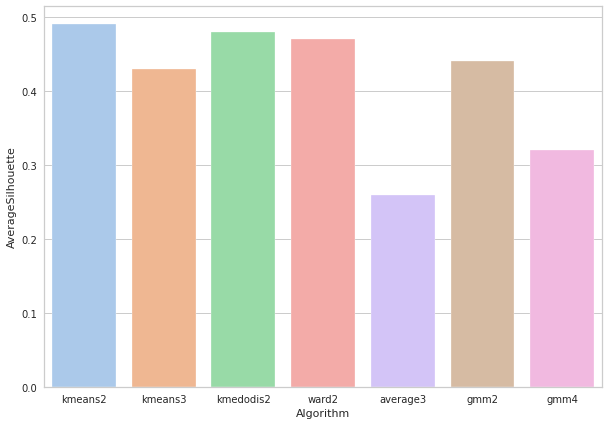

In [268]:


plt.figure(figsize=(10,7))
sns.barplot(data=results, y=results.AverageSilhouette, x=results.Algorithm, palette="pastel")

When I compare the Average Silhouette values of each clustering, I find that kmeans with 2 clusters is the best clustering.

### Calinski-Harabasz

<Axes: xlabel='Algorithm', ylabel='CalinskiHarabasz'>

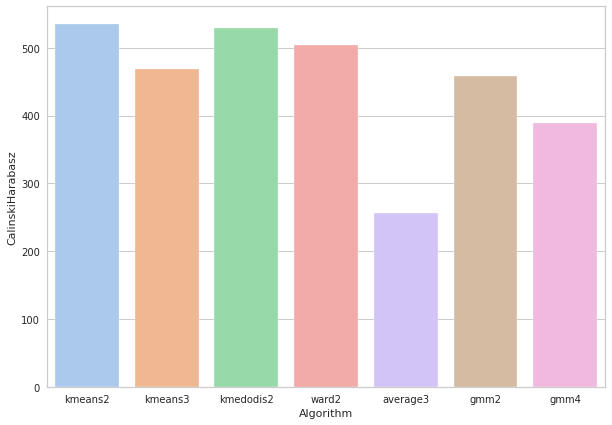

In [269]:
plt.figure(figsize=(10,7))
sns.barplot(data=results, y=results.CalinskiHarabasz, x=results.Algorithm, palette="pastel")

When I compare the Calinski-Harabasz values of each clustering, I find that kmeans with 2 clusters is the best clustering.

### Adjusted Rand Index

<Axes: xlabel='Algorithm', ylabel='AdjustedRandIndex'>

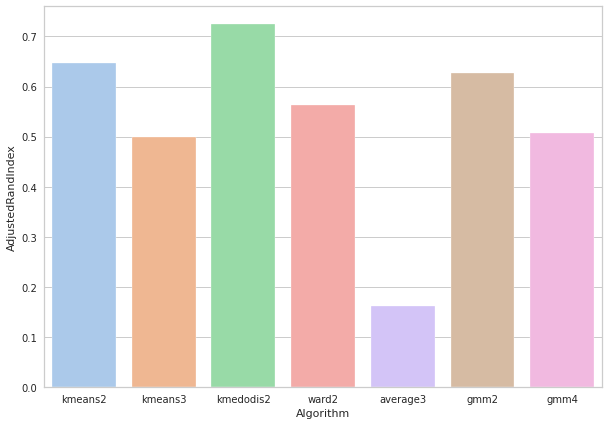

In [270]:
plt.figure(figsize=(10,7))
sns.barplot(data=results, y=results.AdjustedRandIndex, x=results.Algorithm, palette="pastel")

When I compare the Adjusted Rand values of each clustering, I find that kmedoids with 2 clusters is the best clustering.

### Accuracy Rate

<Axes: xlabel='Algorithm', ylabel='AccuracyRate'>

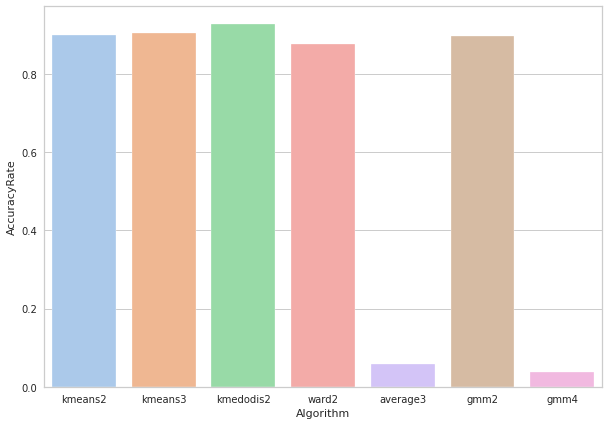

In [271]:


plt.figure(figsize=(10,7))
sns.barplot(data=results, y=results.AccuracyRate, x=results.Algorithm, palette="pastel")


When I compare the Accuracy Rates of each clustering, I find that kmedoids with 2 clusters is the best clustering.

## Conclusion

When I compare algorithms according to the metrics as a optimal number of cluster, 2 looks fine. In the case of clustering algorithm, in this data set and this analysis, considering the differences in cluster elements, the extreme differences in intra-cluster variances, and the fact that the labels are known; it is thought that it is more appropriate to choose the algorithm with the least frequency difference between the label. In other words, **K - Medoids** was selected as the optimal clustering algorithm and **2** as the optimal number of clusters. Considering that it clustered the data with an error rate of 7%, it can be said that it is a very successful clustering algorithm.


In [276]:
clusters = pd.DataFrame({"clusters" : kmedoids2.labels_ })

df = pd.concat([df,clusters], axis=1)

df.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension,clusters
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


## Cluster Analysis

In [278]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.11000
texture,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.28000
perimeter,569.0,91.969033,24.298981,43.79000,75.17000,86.24000,104.10000,188.50000
area,569.0,654.889104,351.914129,143.50000,420.30000,551.10000,782.70000,2501.00000
smoothness,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.16340
compactness,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.34540
concavity,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.42680
concave.points,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.20120
symmetry,569.0,0.181162,0.027414,0.10600,0.16190,0.17920,0.19570,0.30400
fractal.dimension,569.0,0.062798,0.007060,0.04996,0.05770,0.06154,0.06612,0.09744


In [277]:
df.groupby("clusters").mean()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
clusters,,,,,,,,,,
0,17.825732,21.322579,118.083526,1016.873158,0.104433,0.155455,0.175400,0.094429,0.196569,0.06361
1,12.273193,18.270501,78.877335,473.419525,0.092313,0.078716,0.045385,0.026104,0.173438,0.06239


| Variables         | Cluster Zero  | Cluster One    |
|-------------------|---------------|----------------|
| Radius            | High          | Average        |
| Texture           | Average       | Average        |
| Perimeter         | High          | Low            |
| Area              | High          | Low            |
| Smoothness        | Average       | Average        |
| Compactness       | High          | Low            |
| Concavity         | Average       | Low            |
| Concave Points    | High          | Low            |
| Symmetry          | Average       | Average        |
| Fractal Dimension | Average       | Average        |

In [279]:
df1.groupby("Diagnosis").mean()

,ID,radius,texture,perimeter,area,smoothness,compactness,concavity,concave.points,symmetry,fractal.dimension
Diagnosis,,,,,,,,,,,
0,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680
1,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867


When the descriptive statistics values extracted according to the 0 (malignant tumor) and 1 (benign tumor) labels are examined, it is noticed that the averages of the observations in the M label in the variables are above the average. Considering that the cluster in which the variables are above the average in the clustering results is cluster zero; it can be said that cluster zero refers to malignant tumor and cluster one refers to benign tumor.


### Cluster Visualization

/home/feo/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/feo/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


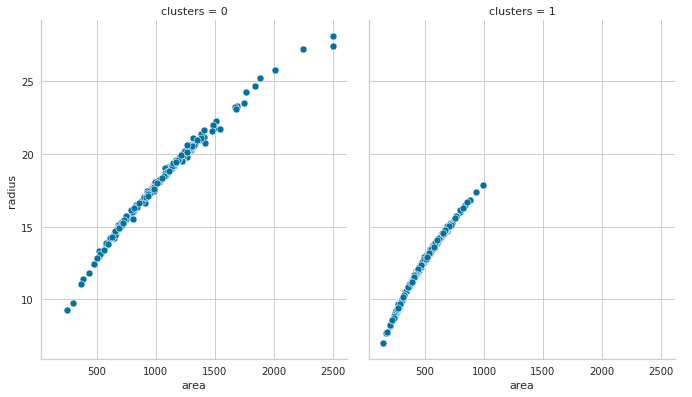

In [287]:

g = sns.FacetGrid(df, col="clusters")
g.map(sns.scatterplot, "area", "radius")
g.figure.set_size_inches(10,7)
g.add_legend()


/home/feo/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/feo/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


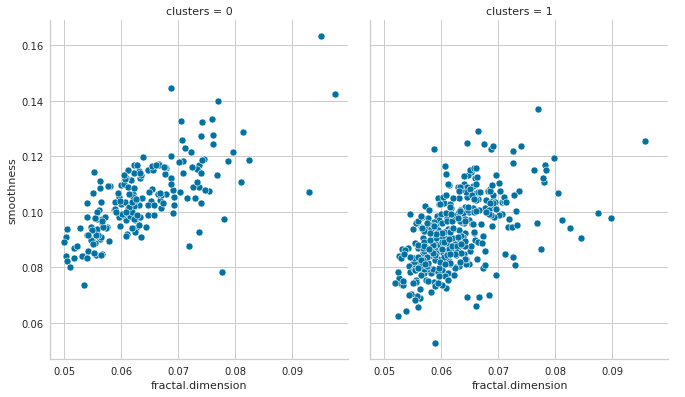

In [288]:
h = sns.FacetGrid(df, col="clusters")
h.map(sns.scatterplot, "fractal.dimension", "smoothness")
h.figure.set_size_inches(10,7)
h.add_legend()

In the graph for M (Malignant Tumor), a positive relationship is observed starting from Radius 8, Area 25 band and reaching the maximum values of both values. For B (Benign Tumor), a positive relationship is observed in both variables starting at 0 and ending at 1000 for Area and 17 for Radius. From this graph, it can be inferred that the areas of the nucleus of malignant tumors are in a wider range, while the areas of benign tumors do not grow much. The radius of benign tumors does not increase beyond 17.
